In [ ]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 8.0 MB/s eta 0:00:00


In [ ]:
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum-extra.
(Reading database ... 122518 files and directories currently installed.)
Preparing to unpack .../fonts-nanum-extra_20180306-3_all.deb ...
Unpacking fonts-nanum-extra (20180306-3) ...
Selecting previously unselected package fonts-nanum.
Preparing to unpack .../fonts-nanum_20180306-3_all.deb ...
Unpacking fonts-nanum (20180306-3) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-2_all.deb ...
Unpacking fonts-nanum-coding (2.5-2) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Setting up fonts-nanum-extra (20180306-3) ...
Setting up fonts-nanum (20180306-3) ...
Setting up fonts-nanum-coding (2.5-2) ...
Setting up fonts-nanum-eco (1.000-7) ...
Processing triggers for fontconfig (2.13.1-2ubuntu3) ...


In [ ]:
import requests
from bs4 import BeautifulSoup
import re

In [ ]:
import os
import sys
import urllib.request
import json
import pandas  as pd

In [ ]:
df = pd.read_csv('대학백과_가천대_리뷰.csv')
df

,Unnamed: 0,0
0,0,위치는 정말 좋음. 서울에서 3분거리고 또 바로 밑엔 분당이라 어디는 갈수 있더라....
1,1,자신이 스펙쌓기나 열심히 학점 채우기만하면 어느 곳이든 취업할수 있는듯함.
2,2,지하철이 학교랑 연결되어 있어서 접근성이 정말 좋아요 장학제도도 잘 되어있고 재정도...
3,3,컴공 학생 전원에게 노트북 장학금으로 40만원의 지원금을 줍니다. 예전에 비해서 교...
4,4,확실히 학교의 발전을 위해 재단에서 다방면에 투자하는 모습이 느껴져요. 전문직 아웃...
...,...,...
1563,1563,일단 학과 자체에 선후배가 심하고 군기가 있지않음. 워낙 나이 많은 사람들도 많아서...
1564,1564,원래 법학과 진학을 원했던지라 전공 공부는 어렵다고 느껴져도 할 만 했어요. 무엇보...
1565,1565,앞서 말했지만 교수님들께서 수업진행을 잘 해주셔요. 취업관련해서 많은 것을 알려주려...
1566,1566,학교의 지리적 위치가 좋아요 인서울 만큼은 아니지만 경기도권에서는 제일 좋은거같아요


In [ ]:
df.columns =['index','리뷰']

In [ ]:
del df['index']

In [ ]:
df = df.dropna()
df

,리뷰
0,위치는 정말 좋음. 서울에서 3분거리고 또 바로 밑엔 분당이라 어디는 갈수 있더라....
1,자신이 스펙쌓기나 열심히 학점 채우기만하면 어느 곳이든 취업할수 있는듯함.
2,지하철이 학교랑 연결되어 있어서 접근성이 정말 좋아요 장학제도도 잘 되어있고 재정도...
3,컴공 학생 전원에게 노트북 장학금으로 40만원의 지원금을 줍니다. 예전에 비해서 교...
4,확실히 학교의 발전을 위해 재단에서 다방면에 투자하는 모습이 느껴져요. 전문직 아웃...
...,...
1563,일단 학과 자체에 선후배가 심하고 군기가 있지않음. 워낙 나이 많은 사람들도 많아서...
1564,원래 법학과 진학을 원했던지라 전공 공부는 어렵다고 느껴져도 할 만 했어요. 무엇보...
1565,앞서 말했지만 교수님들께서 수업진행을 잘 해주셔요. 취업관련해서 많은 것을 알려주려...
1566,학교의 지리적 위치가 좋아요 인서울 만큼은 아니지만 경기도권에서는 제일 좋은거같아요


In [ ]:
review_text = ''
for temp in df['리뷰']:
    review_text += str(temp)
review_text = re.sub(r'[^가-힣a-zA-Z0-9]',' ',review_text)
review_text

'위치는 정말 좋음  서울에서 3분거리고 또 바로 밑엔 분당이라 어디는 갈수 있더라  또 지하철역도 바로 연결되어있어 비올때 비 안맞고 통학 씹가능함  6등급대학중 가성비 좋은대학인듯 자신이 스펙쌓기나 열심히 학점 채우기만하면 어느 곳이든 취업할수 있는듯함 지하철이 학교랑 연결되어 있어서 접근성이 정말 좋아요 장학제도도 잘 되어있고 재정도 넉넉해서 지원을 많이 해줍니다  다만 수업 듣는 강의실이 멀어서 그건 단점이에요 컴공 학생 전원에게 노트북 장학금으로 40만원의 지원금을 줍니다  예전에 비해서 교수님들 수준도 많이 올라가고 다들 열심히 해서 컴공 분야에 관심만 있다면 추천합니다  하지만 대형 과라 단합이 잘 되지 않는 건 단점이에요 확실히 학교의 발전을 위해 재단에서 다방면에 투자하는 모습이 느껴져요  전문직 아웃풋을 높이기 위해 고시관을 개편하는 모습이 문과인 저로서는 크게 와닿았어요  실제로 아웃풋이 매년 좋아지고 있는데 제작년에 세무사 10명  이번에 로스쿨 8명  회계사 4명을 배출했고  각종 다양한 전문직에서 소수의 인원을 배출하고 있어요  문과 쪽은 아니지만 올해 5급 공채에 합격한 분도 계셨구요  그래서 이쪽으로 진로를 잡은 학생들에게는 일종의 동기부여가 되지 않을까라는 생각이 들어요  학교 시설 같은 경우에는 현재 통합 광장과 후문을 조성하고 있고 매번 오래된 건물들을 보수하거나 철거하고 새로운 건물을 지으려 하고 있어요  근데 예대나 공대 쪽은 건물이 구식이라 불만이 있는 것 같아요  학교에서 취업 지원을 위한 특강들을 많이 개설하는데 학생들이 얼마나 관심을 가지느냐가 중요한 것 같아요  캠퍼스 문화는 여느 대학과 마찬가지로 개인주의에요  학교에 애교심이 있는 학생들도 많지만 대략적으로 상위 20퍼센트가 진학하는 곳이다 보니 본인이 애매한 위치라 생각해서 반수나 편입을 결심하거나 어쩔 수 없이 학교를 다니는 학생들도 있어요 경영학과는 문과의 꽃이라 불릴 만큼 다양한 교과목을 배울 수 있는데 교과목은 마케팅  인사  경영정보  경영전략  생산

In [ ]:
from konlpy.tag import Okt
import re
from collections import Counter
from wordcloud import WordCloud

# Okt 함수를 이용해 형태소 분석
okt = Okt()
line =[]

line = okt.pos(review_text)

print(line)

n_adj =[]
# 명사 또는 형용사인 단어만 n_adj에 넣어주기
for word, tag in line:
    if tag in ['Noun','Adjective']:
        if len(word) > 1:
            n_adj.append(word)
# 명사 또는 형용사인 단어 및 2글자 이상인 단어 선택 시
# n_adj = [word for wor

[('위치', 'Noun'), ('는', 'Josa'), ('정말', 'Noun'), ('좋음', 'Adjective'), ('서울', 'Noun'), ('에서', 'Josa'), ('3분', 'Number'), ('거리고', 'Foreign'), ('또', 'Noun'), ('바로', 'Noun'), ('밑', 'Noun'), ('엔', 'Josa'), ('분당', 'Noun'), ('이라', 'Josa'), ('어디', 'Noun'), ('는', 'Josa'), ('갈수', 'Noun'), ('있더라', 'Adjective'), ('또', 'Noun'), ('지하철역', 'Noun'), ('도', 'Josa'), ('바로', 'Noun'), ('연결', 'Noun'), ('되어있어', 'Verb'), ('비올', 'Noun'), ('때', 'Noun'), ('비', 'Noun'), ('안', 'VerbPrefix'), ('맞고', 'Verb'), ('통학', 'Noun'), ('씹', 'Verb'), ('가능함', 'Adjective'), ('6등', 'Number'), ('급대학중', 'Foreign'), ('가성', 'Noun'), ('비', 'Noun'), ('좋은대', 'Adjective'), ('학인', 'Noun'), ('듯', 'Noun'), ('자신', 'Noun'), ('이', 'Josa'), ('스펙', 'Noun'), ('쌓기나', 'Verb'), ('열심히', 'Adverb'), ('학점', 'Noun'), ('채우기', 'Verb'), ('만하', 'Noun'), ('면', 'Josa'), ('어느', 'Adverb'), ('곳', 'Noun'), ('이든', 'Josa'), ('취업', 'Noun'), ('할수', 'Verb'), ('있는듯', 'Adjective'), ('함', 'Noun'), ('지하철', 'Noun'), ('이', 'Josa'), ('학교', 'Noun'), ('랑', 'Josa'), ('연결', 'Noun')

In [ ]:
#제외할 단어 추가
stop_words = "가천대 학교 대학 학과 학생 교수 수업 때문 입니다 정말 사람 생각" #추가할 때 띄어쓰기로 추가해주기
stop_words = set(stop_words.split(' '))
# 불용어를 제외한 단어만 남기기
n_adj = [word for word in n_adj if not word in stop_words]
n_adj
#가장 많이 나온 단어 100개 저장
counts = Counter(n_adj)
tags = counts.most_common(100)
tags

[('전공', 213),
 ('건물', 203),
 ('공부', 195),
 ('장학금', 176),
 ('있는', 167),
 ('시설', 166),
 ('좋아요', 158),
 ('취업', 152),
 ('캠퍼스', 150),
 ('분위기', 146),
 ('좋은', 128),
 ('정도', 119),
 ('장점', 117),
 ('추천', 116),
 ('선배', 116),
 ('있어서', 108),
 ('없고', 107),
 ('매우', 102),
 ('단점', 101),
 ('편이', 95),
 ('친구', 94),
 ('지원', 93),
 ('있고', 90),
 ('별로', 89),
 ('학점', 88),
 ('학년', 87),
 ('진짜', 84),
 ('많아서', 82),
 ('있어요', 81),
 ('교통', 79),
 ('선후배', 74),
 ('성적', 73),
 ('있습니다', 72),
 ('있다', 71),
 ('좋음', 69),
 ('다른', 69),
 ('아웃', 66),
 ('많은', 66),
 ('없다', 66),
 ('복수', 64),
 ('우리', 63),
 ('그냥', 62),
 ('하나', 62),
 ('좋고', 62),
 ('자체', 61),
 ('많고', 61),
 ('일단', 61),
 ('경우', 60),
 ('커리큘럼', 60),
 ('군기', 60),
 ('거의', 59),
 ('없는', 59),
 ('같은', 58),
 ('조금', 58),
 ('주변', 58),
 ('노력', 56),
 ('서울', 55),
 ('전과', 55),
 ('본인', 54),
 ('좋습니다', 54),
 ('나름', 54),
 ('다양한', 52),
 ('좋다', 52),
 ('분야', 51),
 ('저희', 51),
 ('도서관', 49),
 ('많아요', 49),
 ('공대', 48),
 ('같아요', 48),
 ('대한', 48),
 ('자신', 47),
 ('없음', 47),
 ('대부분', 46),
 ('많다', 46),


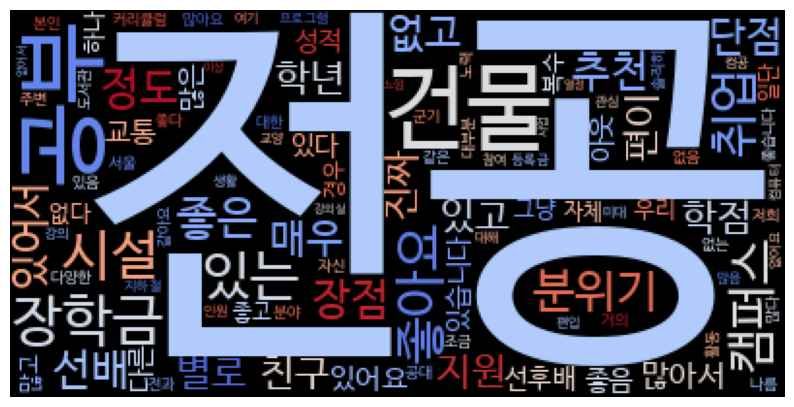

In [ ]:
path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
word_cloud = WordCloud(font_path=path, background_color='black',max_font_size=400,colormap='coolwarm').generate_from_frequencies(dict(tags))

# 사이즈 설정 및 화면에 출력
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.imshow(word_cloud)
plt.axis('off')
#워드클라우드 사진으로 저장
plt.savefig('대학백과_가천대_리뷰_워드클라우드.png', bbox_inches='tight')
plt.show()

In [ ]:
# 워드클라우드 복붙
wordcloud_1 = str(tags)
wordcloud_1 = wordcloud_1.replace("'",' ')
wordcloud_1

'[( 전공 , 213), ( 건물 , 203), ( 공부 , 195), ( 장학금 , 176), ( 있는 , 167), ( 시설 , 166), ( 좋아요 , 158), ( 취업 , 152), ( 캠퍼스 , 150), ( 분위기 , 146), ( 좋은 , 128), ( 정도 , 119), ( 장점 , 117), ( 추천 , 116), ( 선배 , 116), ( 있어서 , 108), ( 없고 , 107), ( 매우 , 102), ( 단점 , 101), ( 편이 , 95), ( 친구 , 94), ( 지원 , 93), ( 있고 , 90), ( 별로 , 89), ( 학점 , 88), ( 학년 , 87), ( 진짜 , 84), ( 많아서 , 82), ( 있어요 , 81), ( 교통 , 79), ( 선후배 , 74), ( 성적 , 73), ( 있습니다 , 72), ( 있다 , 71), ( 좋음 , 69), ( 다른 , 69), ( 아웃 , 66), ( 많은 , 66), ( 없다 , 66), ( 복수 , 64), ( 우리 , 63), ( 그냥 , 62), ( 하나 , 62), ( 좋고 , 62), ( 자체 , 61), ( 많고 , 61), ( 일단 , 61), ( 경우 , 60), ( 커리큘럼 , 60), ( 군기 , 60), ( 거의 , 59), ( 없는 , 59), ( 같은 , 58), ( 조금 , 58), ( 주변 , 58), ( 노력 , 56), ( 서울 , 55), ( 전과 , 55), ( 본인 , 54), ( 좋습니다 , 54), ( 나름 , 54), ( 다양한 , 52), ( 좋다 , 52), ( 분야 , 51), ( 저희 , 51), ( 도서관 , 49), ( 많아요 , 49), ( 공대 , 48), ( 같아요 , 48), ( 대한 , 48), ( 자신 , 47), ( 없음 , 47), ( 대부분 , 46), ( 많다 , 46), ( 있음 , 45), ( 솔직히 , 44), ( 활동 , 44), ( 등록금 , 43), ( 여기 , 42), ( 생활 , 42)